In [32]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas_datareader as dr



In [33]:
df=dr.data.get_data_yahoo('TVTODAY.NS',start='2015-10-6',end='2020-10-12')


In [34]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-06,283.299988,269.100006,281.000000,272.200012,364185.0,245.234344
2015-10-07,279.000000,265.649994,274.000000,269.100006,215082.0,242.441452
2015-10-08,277.149994,265.299988,270.850006,269.000000,456505.0,242.351349
2015-10-09,274.899994,267.350006,269.000000,269.500000,260212.0,242.801849
2015-10-12,278.799988,266.600006,271.000000,267.700012,247448.0,241.180099
...,...,...,...,...,...,...
2020-10-07,204.000000,198.250000,201.899994,201.199997,19150.0,201.199997
2020-10-08,203.949997,196.350006,202.000000,197.750000,22005.0,197.750000
2020-10-09,200.000000,195.949997,200.000000,197.399994,13768.0,197.399994


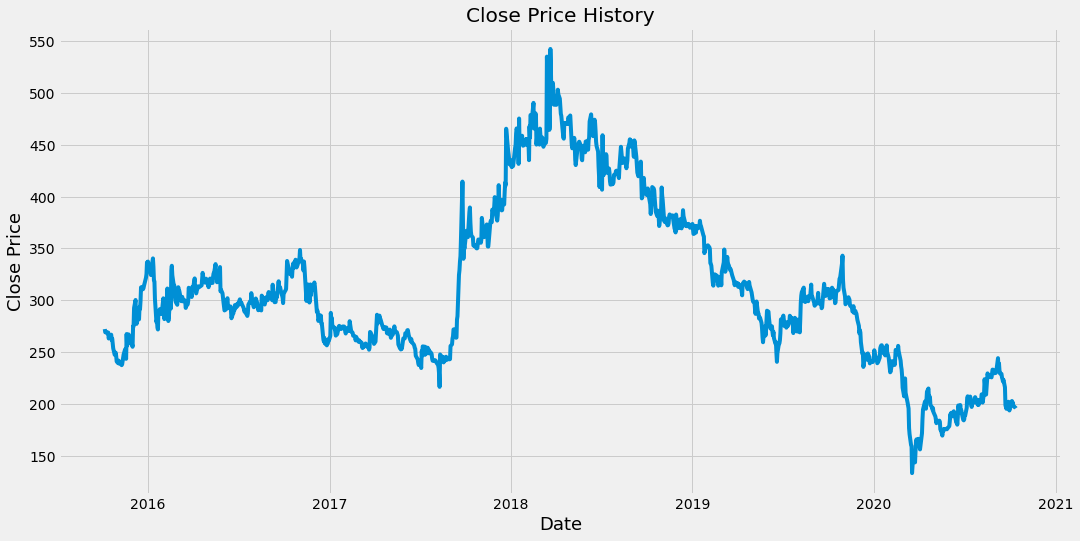

In [35]:
#visuliazing the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [36]:
#new dataframe
data=df.filter(['Close'])
#coverting to numpy
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

989

In [37]:
#scaling the datas
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.33956734],
       [0.33198878],
       [0.3317443 ],
       ...,
       [0.15670455],
       [0.15450434],
       [0.15279307]])

In [38]:
#creating the dataset
train_data=scaled_data[0:training_data_len,:]
#split
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.33956734, 0.33198878, 0.3317443 , 0.33296664, 0.32856623,
       0.33149982, 0.31732065, 0.32343237, 0.3186652 , 0.32636595,
       0.31377582, 0.31732065, 0.29421831, 0.2788168 , 0.27967242,
       0.28407286, 0.27612762, 0.26304852, 0.2590148 , 0.26512652,
       0.25840363, 0.25938149, 0.26084832, 0.25449211, 0.25644787,
       0.27979466, 0.29189586, 0.27759445, 0.26940473, 0.32783278,
       0.30033003, 0.32697713, 0.31634279, 0.31890968, 0.30680844,
       0.30387486, 0.29776314, 0.34616795, 0.34592347, 0.38943898,
       0.40814083, 0.37012595, 0.35179078, 0.35619119, 0.3625474 ,
       0.3626696 , 0.39102801, 0.38699429, 0.40545166, 0.43796607,
       0.43906614, 0.43344338, 0.43613255, 0.44175531, 0.46070165,
       0.46950254, 0.49663861, 0.49553847, 0.49871653, 0.47903682])]
[0.4809925386922517]



In [39]:
#converting to numpy
x_train,y_train=np.array(x_train),np.array(y_train)

In [40]:
#reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(929, 60, 1)

In [41]:
#LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [42]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
model.fit(x_train,y_train,batch_size=1,epochs=3)

Epoch 1/3
929/929 [==============================] - 20s 21ms/step - loss: 0.0034
Epoch 2/3
929/929 [==============================] - 19s 21ms/step - loss: 0.0016
Epoch 3/3
929/929 [==============================] - 19s 21ms/step - loss: 0.0014


In [44]:
#creating rhe testing data
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [45]:
#numpy to array
x_test=np.array(x_test)

In [46]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [47]:
#get the models prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [48]:
#RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


9.751259311894318

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


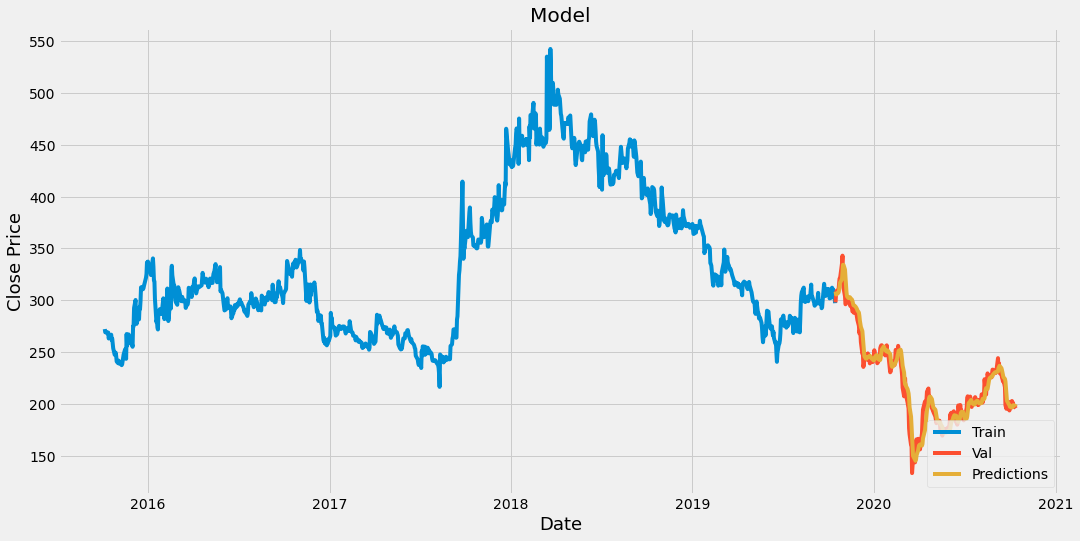

In [49]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [50]:
valid

,Close,Predictions
Date,,
2019-10-16,297.950012,308.304932
2019-10-17,306.200012,305.584473
2019-10-18,309.000000,305.660767
2019-10-22,309.799988,307.369690
2019-10-23,315.799988,309.449310
...,...,...
2020-10-07,201.199997,198.081406
2020-10-08,197.750000,198.835403
2020-10-09,197.399994,198.695587


In [51]:
len(test_data)

307

In [52]:
x_input=test_data[207:].reshape(1,-1)
x_input.shape


(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.10451045806249959,
 0.10328811352375694,
 0.10463269997697289,
 0.10646621678508689,
 0.1107444226706863,
 0.12272338422916662,
 0.13849162131834825,
 0.1317687263552635,
 0.1422808968490496,
 0.1414252407507317,
 0.13751376060855208,
 0.1457034466363311,
 0.13396896890679733,
 0.13702483025365403,
 0.11942303905336338,
 0.12712383202923927,
 0.11416697245796781,
 0.13030193529056927,
 0.15939372039144717,
 0.14448110209758847,
 0.16049382301571663,
 0.1426475852894744,
 0.14863710337170954,
 0.14130303613925344,
 0.12565700366155008,
 0.12431241720833414,
 0.12663490167434122,
 0.1380026909634502,
 0.13616917415533614,
 0.15364868613815857,
 0.17748440464364096,
 0.18102923364839069,
 0.1783400607419588,
 0.16685002953837658,
 0.18041806137901933,
 0.17112823542397598,
 0.16183840946893258,
 0.15597117060416565,
 0.16477202890131604,
 0.16599437344005868,
 0.1664833037949568,
 0.17650654393384474,
 0.17907347492580344,
 0.17601761357894669,
 0.1652609592562141,
 0.16134947911403447

In [55]:
#predicting the next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15451027]
101
1 day input [0.10328811 0.1046327  0.10646622 0.11074442 0.12272338 0.13849162
 0.13176873 0.1422809  0.14142524 0.13751376 0.14570345 0.13396897
 0.13702483 0.11942304 0.12712383 0.11416697 0.13030194 0.15939372
 0.1444811  0.16049382 0.14264759 0.1486371  0.14130304 0.125657
 0.12431242 0.1266349  0.13800269 0.13616917 0.15364869 0.1774844
 0.18102923 0.17834006 0.16685003 0.18041806 0.17112824 0.16183841
 0.15597117 0.16477203 0.16599437 0.1664833  0.17650654 0.17907347
 0.17601761 0.16526096 0.16134948 0.1721061  0.16073831 0.17100599
 0.16819462 0.17259503 0.18555189 0.18591861 0.16623886 0.1894634
 0.2213666  0.20804302 0.20327588 0.18506296 0.23505684 0.22906736
 0.2260115  0.23077863 0.23004522 0.22747833 0.22564481 0.2338345
 0.24385774 0.24385774 0.23530132 0.23664591 0.24080187 0.23664591
 0.24385774 0.27099376 0.24544677 0.25864811 0.24214646 0.23481239
 0.23407898 0.22540033 0.22173329 0.21598826 0.22014426 0.20242026
 0.15988265 0.15523776 0.15157072 0.16

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt

In [58]:
day_new,scaler.inverse_transform(scaled_data[1136:])

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]), array([[176.05000305],
        [175.55000305],
        [176.1000061 ],
        [176.8500061 ],
        [178.6000061 ],
        [183.5       ],
        [189.94999695],
        [187.19999695],
        [191.5       ],
        [191.1499939 ],
        [189.55000305],
        [192.8999939 ],
        [188.1000061 ],
        [189.3500061 ],
        [182.1499939 ],
        [185.30000305],
        [180.        ],
        [186.6000061 ],
   

In [59]:
#Predictions of 13 october to 23 october.
day_pred,scaler.inverse_transform(lst_output)

(array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130]), array([[196.5024266 ],
        [195.93120373],
        [195.46151669],
        [195.02126395],
        [194.58650918],
        [194.14944429],
        [193.70766162],
        [193.26052117],
        [192.80794369],
        [192.34997795],
        [191.88670319],
        [191.41818035],
        [190.94442773],
        [190.46543314],
        [189.98119048],
        [189.49164488],
        [188.9967537 ],
        [188.49645596],
        [187.99068463],
        [187.47936656],
        [186.96245907],
        [186.43988904],
        [185.9116016 ],
        [185.3775236 ],
        [184.83761238],
        [184.29181309],
        [183.74006476],
        [183.18232473],
        [182.61854424],
        [182.04867453]]))

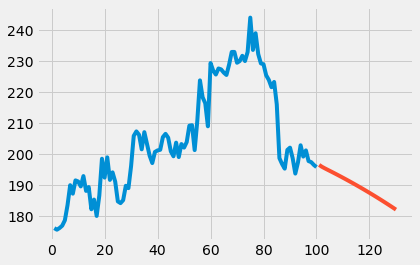

In [61]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[1136:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
#Create a new dataframe to predict the next day open price 19th oct.
#new_df = df.filter(['Open'])
#Get teh last 60 day closing price 
###last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
#last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
#X_test = []
#Append teh past 60 days
#X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
#X_test = np.array(X_test)
#Reshape the data
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
#pred_price_open = model.predict(X_test)
#undo the scaling 
#pred_price_open = scaler.inverse_transform(pred_price_open)

In [ ]:
#getting the Last 60 data to predict the next day ie...8th october with 99% accuracy.
#pred_price_open